In [ ]:
# Regresión simple

In [1]:
library(tidyverse)
library(gifski)
library(tidyverse)
library(gganimate)
library(plotly)
library(RColorBrewer)
library(wesanderson)


Warning message:
"replacing previous import 'lifecycle::last_warnings' by 'rlang::last_warnings' when loading 'tibble'"
Warning message:
"replacing previous import 'lifecycle::last_warnings' by 'rlang::last_warnings' when loading 'hms'"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout




#### Datos de la sesión pasada


In [10]:
casos_diarios <-  read.csv(file = "Casos_Diarios_Estado_Nacional.csv")
casos_diario_list <- gather(casos_diarios,key ="dias",value="infectados",4:856)

normalizarfecha <- function(fecha){
return(str_replace_all(fecha,"X","")  %>% str_replace_all("\\.","/"))
}

cod_Meses <- function(x) {

labels_meses <- c(
    "Ene","Feb","Mar","Abr","May","Jun",
    "Jul","Ago","Sep","Oct","Nov","Dic")

    return(factor(x,levels = (1:12),labels = labels_meses))
    
    }

fecha = map(casos_diario_list[4],normalizarfecha)
casos_diarios_fecha <- cbind(casos_diario_list[c(TRUE,TRUE,TRUE,FALSE,TRUE)],fecha)
casos_diarios_fecha <- casos_diarios_fecha[c(1,2,3,5,4)]

datos <- separate( data = casos_diarios_fecha,
                   col =dias,
                   into = c("dia","mes","año"),
                   sep = '/',
                   remove = FALSE)
#recordatorio
datos <- datos %>% mutate(mest_txt = cod_Meses(as.integer(mes)))%>% mutate(consecutivo=1:28149)




#datos %>%select(cve_ent,poblacion,infectados,consecutivo)%>% cov()
#datos<-datos%>%mutate(infectadosnew=(infectados/poblacion)*100000)
#datos %>%select(cve_ent,poblacion,infectados,consecutivo,infectadosnew)%>% cov()

datosf<-datos%>% filter(nombre=="Nacional")%>%mutate(consecutivo=1:853)
head(datosf)
str(datosf)

,cve_ent,poblacion,nombre,dias,dia,mes,año,infectados,mest_txt,consecutivo
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<fct>,<int>
1,0,127792286,Nacional,26/02/2020,26,02,2020,0,Feb,1
2,0,127792286,Nacional,27/02/2020,27,02,2020,4,Feb,2
3,0,127792286,Nacional,28/02/2020,28,02,2020,2,Feb,3
4,0,127792286,Nacional,29/02/2020,29,02,2020,2,Feb,4
5,0,127792286,Nacional,01/03/2020,01,03,2020,2,Mar,5
6,0,127792286,Nacional,02/03/2020,02,03,2020,5,Mar,6


'data.frame':	853 obs. of  10 variables:
 $ cve_ent    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ poblacion  : int  127792286 127792286 127792286 127792286 127792286 127792286 127792286 127792286 127792286 127792286 ...
 $ nombre     : chr  "Nacional" "Nacional" "Nacional" "Nacional" ...
 $ dias       : chr  "26/02/2020" "27/02/2020" "28/02/2020" "29/02/2020" ...
 $ dia        : chr  "26" "27" "28" "29" ...
 $ mes        : chr  "02" "02" "02" "02" ...
 $ año        : chr  "2020" "2020" "2020" "2020" ...
 $ infectados : int  0 4 2 2 2 5 9 10 11 6 ...
 $ mest_txt   : Factor w/ 12 levels "Ene","Feb","Mar",..: 2 2 2 2 3 3 3 3 3 3 ...
 $ consecutivo: int  1 2 3 4 5 6 7 8 9 10 ...


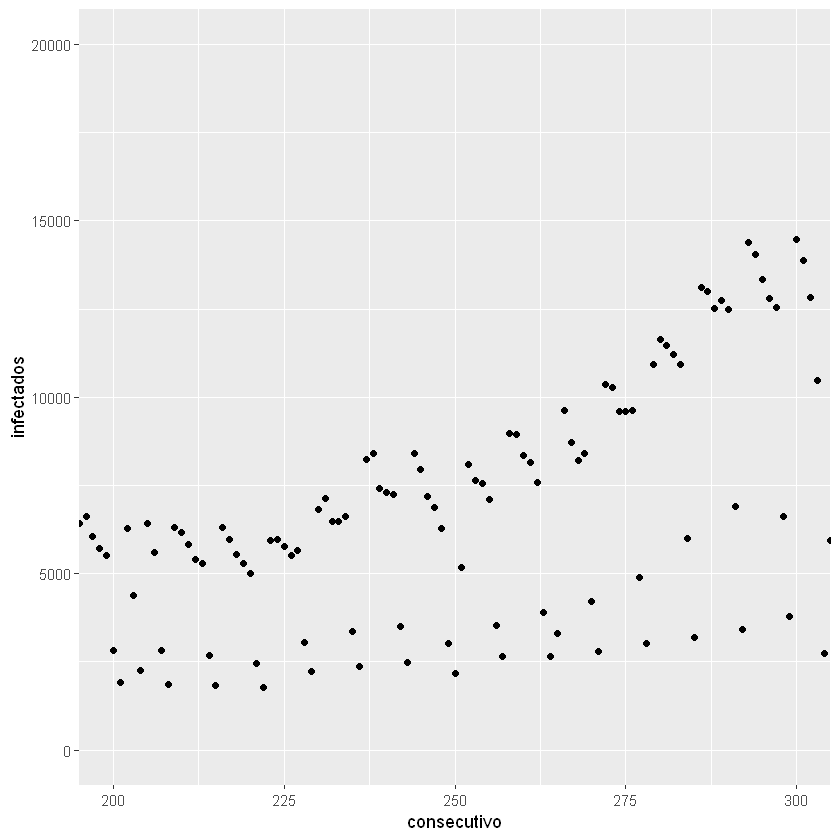

In [13]:
datosf%>%ggplot(aes(x=consecutivo,y=infectados))+
    geom_point()+coord_cartesian(xlim=c(200,300),ylim=c(0,20000))



In [14]:
datost=datosf%>%filter(consecutivo>=200)%>%filter(consecutivo<=300)

regresion<-lm(infectados~consecutivo,data=datost)
summary(regresion)


Call:
lm(formula = infectados ~ consecutivo, data = datost)

Residuals:
    Min      1Q  Median      3Q     Max 
-6378.3 -2209.7   868.3  1885.9  4620.0 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -10569.829   2324.813  -4.547 1.55e-05 ***
consecutivo     69.388      9.237   7.512 2.62e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2706 on 99 degrees of freedom
Multiple R-squared:  0.3631,	Adjusted R-squared:  0.3566 
F-statistic: 56.43 on 1 and 99 DF,  p-value: 2.619e-11


 Named num [1:101] 3308 3377 3447 3516 3585 ...
 - attr(*, "names")= chr [1:101] "1" "2" "3" "4" ...


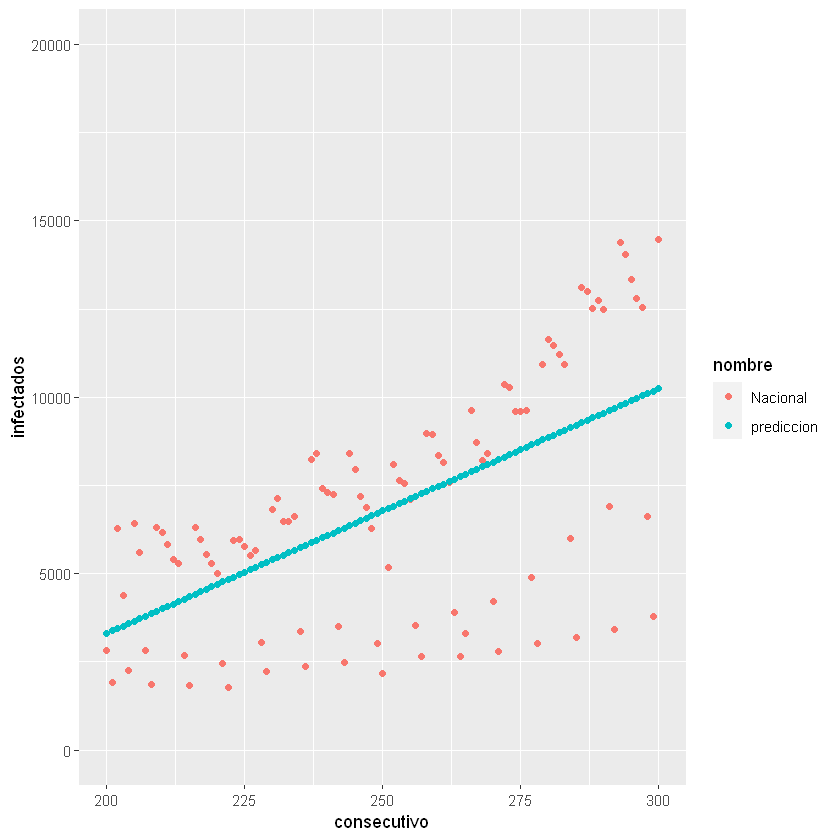

In [16]:
prediccion<-predict(regresion,consecutivo=200:300)
str(prediccion)
prediccion_frame<-data.frame(nombre="prediccion",
                            consecutivo=200:300,
                            infectados= prediccion)

datos_plot<-rbind(select(datost,nombre,consecutivo,infectados),
                  prediccion_frame)

datos_plot%>%ggplot(aes(x=consecutivo,y=infectados,group=nombre,
                       color=nombre))+
    geom_point()+coord_cartesian(xlim=c(200,300),ylim=c(0,20000))



 Named num [1:101] 3308 3377 3447 3516 3585 ...
 - attr(*, "names")= chr [1:101] "1" "2" "3" "4" ...


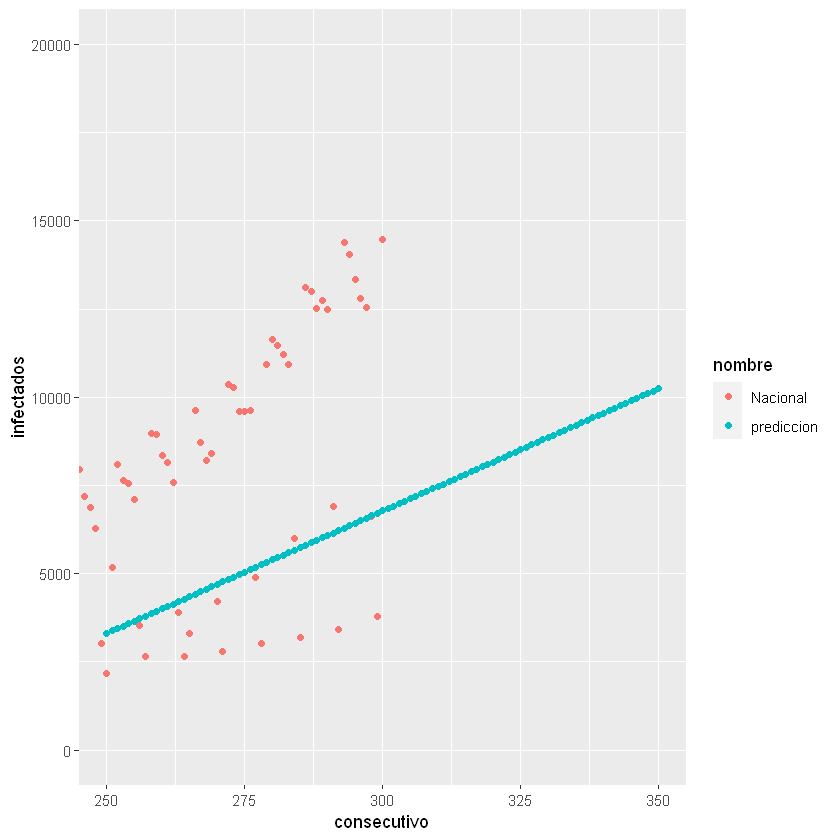

In [17]:

prediccion<-predict(regresion,consecutivo=250:350)
str(prediccion)
prediccion_frame<-data.frame(nombre="prediccion",
                            consecutivo=250:350,
                            infectados= prediccion)

datos_plot<-rbind(select(datost,nombre,consecutivo,infectados),
                  prediccion_frame)

datos_plot%>%ggplot(aes(x=consecutivo,y=infectados,group=nombre,
                       color=nombre))+
    geom_point()+coord_cartesian(xlim=c(250,350),ylim=c(0,20000))
